PCA is a method to reduce dimentionality of feature space by preserving maximum variance. For simpler notation let's say that our features are centered i.e. $\bar{X_j}=0 \forall j$ so (co)variance matrix is $C=X^TX\frac{1}{n-1}$ The covariance matrix is symetric and thus can be diagnolazible in this way:
$$C=VLV^T$$
where V is matrix of eigenvectors and L is diagonal matrix of eigen values $\lambda_i$ written down is descreasing order

$X$ dimensions: $nxk$  
$C$ dimensions: $kxk$  
$V$ dimensions: $kxk$  
$L$ dimensions: $kxk$ 

The eigenvectors are called principal axes or principal directions of the data. Projections of the data on the principal axes are called principal components.

What we need to do now is to the Singular value descomposition on the $X$ matrix: $X=USV^T$  
$U$ is unitary matrix $U^TU=I$  
$S$ is diagnal matrix of equal singular values $U^TU=I$:

$X=(VSU^T)(USV^T)= (VSSV^T) = V\frac{S^2}{n-1}V^T$ 

We call principal components the projection:

$$XV = USV^TV=US$$

Let's do an example let's do the principal components on the good ol' Iris dataset. Let's lay out the steps we need to do in order to carry out the analysis:
1. Center the features
2. Calculate the covariance matrix
3. Calculate eigenvalues and eigenvectors
4. Order eigenvalues and eigenvectors
5. Make a choice how many Principal components to use
6. Project the X matrix onto principal axis to get principal components

In [23]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as pp

iris = datasets.load_iris()
df=pd.DataFrame(iris['data'])
df.columns = ['s_length', 's_width', 'p_length', 'p_width']

In [24]:
df['y']=iris['target']

<AxesSubplot:xlabel='s_length', ylabel='s_width'>

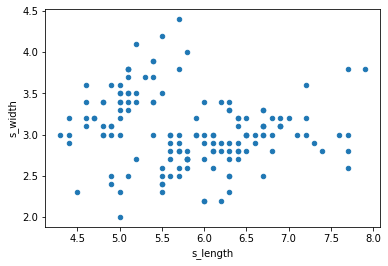

In [25]:
df.plot.scatter(x='s_length', y='s_width')

<AxesSubplot:xlabel='s_length', ylabel='s_width'>

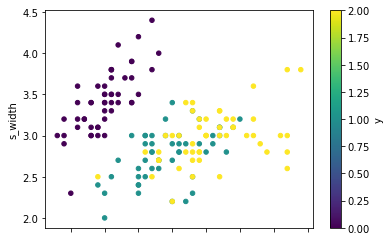

In [26]:
df.plot.scatter(x='s_length', y='s_width', c = 'y', colormap = 'viridis')

In [27]:
#1. Center the features
X_centered=df[['s_length', 's_width']] - df[['s_length', 's_width']].mean()
#2. Calculate the covariance matrix
Sigma=(X_centered.T @ X_centered)/(X_centered.shape[0]-1)
#3. Calculate eigenvalues and eigenvectors
eigen_values , eigen_vectors = np.linalg.eigh(Sigma)
#4. Order eigenvalues and eigenvectors from highest to lowest
idx = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[idx]
sorted_eigenvectors = eigen_vectors[:,idx]
#5  Make a choice how many Principal components to use (in this case 1)
n_components = 1 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
#6. Project the X matrix onto principal axis to get principal components
PC = X_centered @ eigenvector_subset

In [28]:
df['PC1'] = PC

In [39]:
X_centered

,s_length,s_width
0,-0.743333,0.442667
1,-0.943333,-0.057333
2,-1.143333,0.142667
3,-1.243333,0.042667
4,-0.843333,0.542667
...,...,...
145,0.856667,-0.057333
146,0.456667,-0.557333
147,0.656667,-0.057333
148,0.356667,0.342667


In [31]:
eigenvector_subset

array([[-0.99640834],
       [ 0.08467831]])

In [40]:
sorted_eigenvectors

array([[-0.99640834, -0.08467831],
       [ 0.08467831, -0.99640834]])

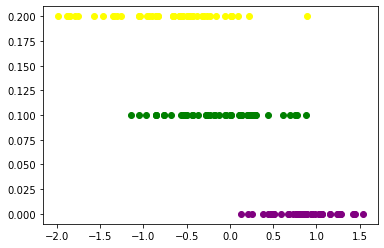

In [73]:
#I'm plotting this on the X axis as 1D just I intrduced some height to separate them
ar0 = df.query('y==0')['PC1'] # just as an example array
ar1 = df.query('y==1')['PC1'] # just as an example array
ar2 = df.query('y==2')['PC1'] # just as an example array
pp.plot(ar0, np.zeros_like(ar) + 0, 'o', color=('purple'))
pp.plot(ar1, np.zeros_like(ar) + 0.1, 'o', color=('green'))
pp.plot(ar2, np.zeros_like(ar) + 0.2, 'o', color=('yellow'))

pp.show()

In [77]:
def get_PCA(df_in, n_comp):
    #1. Center the features
    X_centered=df_in - df_in.mean()
    #2. Calculate the covariance matrix
    Sigma=(X_centered.T @ X_centered)/(X_centered.shape[0]-1)
    #3. Calculate eigenvalues and eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(Sigma)
    #4. Order eigenvalues and eigenvectors from highest to lowest
    idx = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[idx]
    sorted_eigenvectors = eigen_vectors[:,idx]
    #5  Make a choice how many Principal components to use (in this case 1)
    n_components = 1 #you can select any number of components.
    eigenvector_subset = sorted_eigenvectors[:,0:n_comp]
    #6. Project the X matrix onto principal axis to get principal components
    PC = X_centered @ eigenvector_subset
    PC.columns = ['pc' + str(i) for i in range(1, n_comp+1)]
    
    return PC

Now that we have the algorithm down let's use all the featues to make 2Diemnsionas PCs

In [61]:
df_pca2 = get_PCA(df[["s_length",	"s_width",	"p_length",	"p_width"]], 2)
df_pca2['y']=df['y']

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

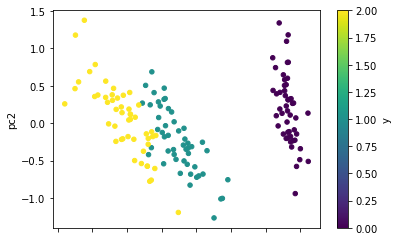

In [72]:
df_pca2.plot.scatter(x='pc1', y='pc2', c='y', colormap = 'viridis')

In [ ]:
PC, evalues, evectors = get_PCA(df[["s_length",	"s_width",	"p_length",	"p_width"]], 2)

In [94]:
evectors

array([[ 0.31548719,  0.58202985,  0.65658877, -0.36138659],
       [-0.3197231 , -0.59791083,  0.73016143,  0.08452251],
       [-0.47983899, -0.07623608, -0.17337266, -0.85667061],
       [ 0.75365743, -0.54583143, -0.07548102, -0.3582892 ]])

In [97]:
df_pca2[['pc1','pc2']].corr()

,pc1,pc2
pc1,1.000000e+00,-6.749031e-16
pc2,-6.749031e-16,1.000000e+00
